In [1]:
city_data = []

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=983894f4700bd681c53ebe98f85c83a1


In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vila velha
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | san jeronimo
Processing Record 6 of Set 1 | rapid valley
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ravar
Processing Record 9 of Set 1 | saleaula
City not found. Skipping...
Processing Record 10 of Set 1 | opelousas
Processing Record 11 of Set 1 | clyde river
Processing Record 12 of Set 1 | erenhot
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | rungata
City not found. Skipping...
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | deputatskiy
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | kieta
Processing Record 23 of Set 1 | lavrentiya
Pr

Processing Record 35 of Set 4 | sungaipenuh
Processing Record 36 of Set 4 | kahului
Processing Record 37 of Set 4 | lebu
Processing Record 38 of Set 4 | saint-philippe
Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | amderma
City not found. Skipping...
Processing Record 41 of Set 4 | palmas
Processing Record 42 of Set 4 | marovoay
Processing Record 43 of Set 4 | khatanga
Processing Record 44 of Set 4 | goderich
Processing Record 45 of Set 4 | cherskiy
Processing Record 46 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 47 of Set 4 | koshurnikovo
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | savannah bight
Processing Record 50 of Set 4 | port blair
Processing Record 1 of Set 5 | san quintin
Processing Record 2 of Set 5 | porec
Processing Record 3 of Set 5 | sioux lookout
Processing Record 4 of Set 5 | cwmbran
Processing Record 5 of Set 5 | mitsamiouli
Processing Record 6 of Set 5 | nikolskoye
Processing Record 7 of 

Processing Record 27 of Set 8 | airai
Processing Record 28 of Set 8 | ribeira brava
Processing Record 29 of Set 8 | bolshaya irba
City not found. Skipping...
Processing Record 30 of Set 8 | maragogi
Processing Record 31 of Set 8 | salinopolis
Processing Record 32 of Set 8 | ituni
City not found. Skipping...
Processing Record 33 of Set 8 | bathsheba
Processing Record 34 of Set 8 | ambulu
Processing Record 35 of Set 8 | bilibino
Processing Record 36 of Set 8 | oktyabrskiy
Processing Record 37 of Set 8 | nueva helvecia
Processing Record 38 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 39 of Set 8 | kanker
Processing Record 40 of Set 8 | xiaoshi
Processing Record 41 of Set 8 | bjornevatn
Processing Record 42 of Set 8 | sorland
Processing Record 43 of Set 8 | oktyabrskoye
Processing Record 44 of Set 8 | poplar bluff
Processing Record 45 of Set 8 | lorengau
Processing Record 46 of Set 8 | mrirt
City not found. Skipping...
Processing Record 47 of Set 8 | ancud
Processing 

Processing Record 10 of Set 12 | hattiesburg
Processing Record 11 of Set 12 | gavle
Processing Record 12 of Set 12 | berdigestyakh
Processing Record 13 of Set 12 | andenes
Processing Record 14 of Set 12 | renqiu
Processing Record 15 of Set 12 | minot
Processing Record 16 of Set 12 | san matias
Processing Record 17 of Set 12 | palmer
Processing Record 18 of Set 12 | lasa
Processing Record 19 of Set 12 | porto novo
Processing Record 20 of Set 12 | hihifo
City not found. Skipping...
Processing Record 21 of Set 12 | klamath falls
Processing Record 22 of Set 12 | turtkul
City not found. Skipping...
Processing Record 23 of Set 12 | moree
Processing Record 24 of Set 12 | sredec
City not found. Skipping...
Processing Record 25 of Set 12 | toora-khem
Processing Record 26 of Set 12 | asilah
Processing Record 27 of Set 12 | frolovo
Processing Record 28 of Set 12 | dongsheng
Processing Record 29 of Set 12 | meyungs
City not found. Skipping...
Processing Record 30 of Set 12 | asmar
Processing Recor

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila Velha,-20.3297,-40.2925,78.94,86,0,8.01,BR,2022-01-11 01:44:56
1,Mataura,-46.1927,168.8643,62.47,62,100,4.34,NZ,2022-01-11 01:43:49
2,Bluff,-46.6000,168.3333,62.80,70,100,14.18,NZ,2022-01-11 01:43:45
3,Butaritari,3.0707,172.7902,80.44,81,88,16.55,KI,2022-01-11 01:44:56
4,San Jeronimo,-11.9472,-75.2829,48.65,90,100,1.99,PE,2022-01-11 01:44:57
5,Rapid Valley,44.0625,-103.1463,54.63,26,0,9.22,US,2022-01-11 01:44:21
6,Rikitea,-23.1203,-134.9692,77.74,75,2,18.59,PF,2022-01-11 01:43:52
7,Ravar,31.2656,56.8055,44.01,35,0,2.48,IR,2022-01-11 01:44:57
8,Opelousas,30.5335,-92.0815,48.09,36,0,9.22,US,2022-01-11 01:44:57
9,Clyde River,70.4692,-68.5914,-16.37,69,0,13.80,CA,2022-01-11 01:44:58


In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig1.png'

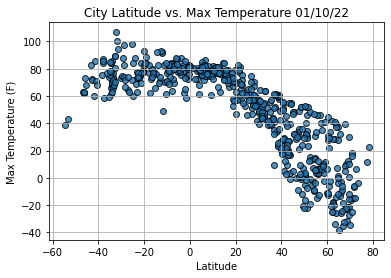

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig2.png'

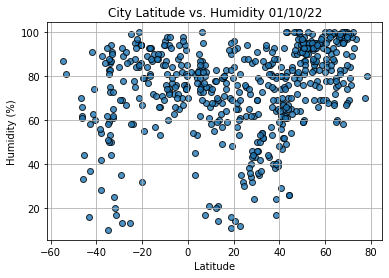

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()